In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def factor_precio(f_01, f_1000):
    slope = (f_1000-f_01)/4
    f_0 = f_01 + slope
    def tempfun(x):
        fun = f_0 + slope * np.log10(x)
        fun2 = np.maximum(fun, f_1000)
        fun3 = np.minimum(fun2, f_01)
        return fun3
    return tempfun

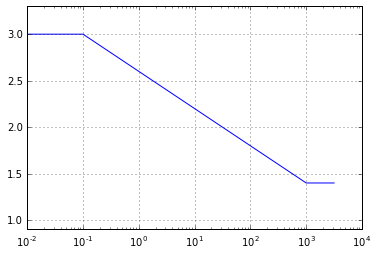

In [19]:
x = np.logspace(-2, 3.5, 500)
y = factor_precio(3,1.4)(x)
plt.plot(x,y)
plt.xscale('log')
plt.ylim((np.min(y)-0.5,np.max(y)*1.1))
plt.grid()

In [3]:
def precios(precio_compra):
    p3_factor = factor_precio(3, 1.3)(precio_compra)
    p3 = precio_compra * p3_factor
    p1 = 2.1 * p3
    p2_factor = factor_precio(1.4, 1.15)(p1)
    p2 = p1 * p2_factor
    p4_factor = factor_precio(2, 1.4)(p1)
    p4 = p1 * p4_factor
    return [p1, p2, p3, p4]

In [21]:
precio_compra_array = np.array([0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000])

In [22]:
precios_venta = np.array(precios(precio_compra_array)).T

In [23]:
print('PC      PVP1    PVP2    PVP3    PVP4')
for ii in range(len(precio_compra_array)):
    print(str(precio_compra_array[ii].round(2)).ljust(7), end = ' ')
    for jj in range(4):
        print(str(precios_venta[ii,jj].round(2)).ljust(7), end = ' ')
    print('')

PC      PVP1    PVP2    PVP3    PVP4
0.01    0.06    0.09    0.03    0.13    
0.05    0.32    0.43    0.15    0.61    
0.1     0.63    0.85    0.3     1.18    
0.5     2.84    3.72    1.35    5.06    
1.0     5.41    6.98    2.58    9.41    
5.0     23.92   29.93   11.39   39.3    
10.0    45.15   55.72   21.5    72.32   
50.0    194.56  232.39  92.65   293.13  
100.0   362.25  426.57  172.5   531.11  
500.0   1499.33 1724.23 713.97  2099.07 
1000.0  2730.0  3139.5  1300.0  3822.0  


In [12]:
def manual_precio():
    precio = float(input('precio de compra:'))
    x = precios(precio)
    print('PC      PVP1    PVP2    PVP3    PVP4')
    print(str(np.round(precio,2)).ljust(7), end = ' ')
    for jj in range(4):
        print(str(x[jj].round(2)).ljust(7), end = ' ')
    return

In [20]:
manual_precio()

precio de compra:45
PC      PVP1    PVP2    PVP3    PVP4
45.0    176.94  211.8   84.26   267.68  

In [21]:
from ipywidgets import interact

In [38]:
def interact_precio(precio):
    x = precios(precio)
    print('PC       PVP1     PVP2     PVP3     PVP4')
    print(str(np.round(precio,2)).ljust(8), end = ' ')
    for jj in range(4):
        print(str(x[jj].round(2)).ljust(8), end = ' ')
    #return

In [39]:
def interact_precio_exp(exp):
    precio = 10**exp
    interact_precio(precio)

In [41]:
interact(interact_precio_exp, exp = [-2, 4, 0.01])

PC       PVP1     PVP2     PVP3     PVP4
0.15     0.95     1.27     0.45     1.76     